### LAB 9-2 : 합성곱 신경망으로 패션 MNIST 분류를 개선하기

In [1]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [3]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [4]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
     keras.layers.MaxPooling2D((2, 2), strides=2),
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, 
                    epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 73s 51ms/step - loss: 0.7649 - accuracy: 0.8117 - val_loss: 0.4137 - val_accuracy: 0.8566
Epoch 2/5
1407/1407 [==============================] - 72s 51ms/step - loss: 0.3513 - accuracy: 0.8767 - val_loss: 0.3628 - val_accuracy: 0.8747
Epoch 3/5
1407/1407 [==============================] - 74s 53ms/step - loss: 0.3113 - accuracy: 0.8895 - val_loss: 0.3434 - val_accuracy: 0.8813
Epoch 4/5
1407/1407 [==============================] - 73s 52ms/step - loss: 0.2837 - accuracy: 0.8973 - val_loss: 0.3334 - val_accuracy: 0.8857
Epoch 5/5
1407/1407 [==============================] - 74s 52ms/step - loss: 0.2757 - accuracy: 0.9026 - val_loss: 0.3328 - val_accuracy: 0.8833


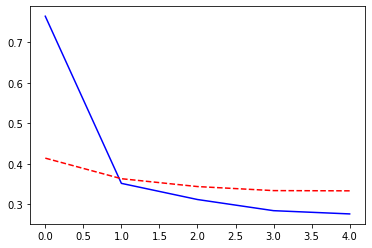

In [7]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

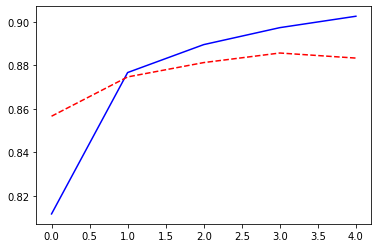

In [8]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 4s - loss: 0.3548 - accuracy: 0.8803 - 4s/epoch - 12ms/step
테스트 정확도: 0.880299985408783


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[4 6 2 9 6 7 7 1 4 4 0 5 0 9 9 8 8 3 6 2 4 6 6 3 2]


In [12]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28,28)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, cmap='gray', interpolation='nearest')

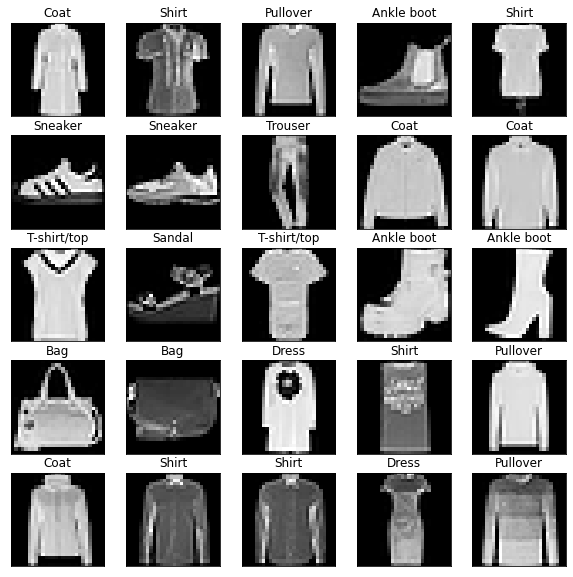

In [13]:
plot_images(images, predictions, images_per_row = 5)

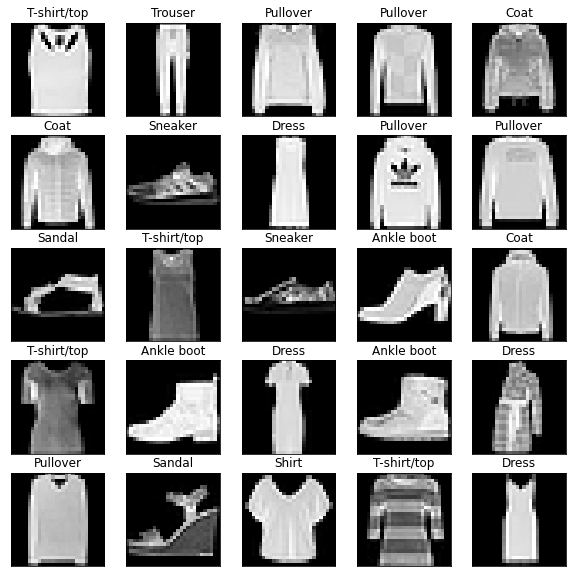

In [14]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)